# Import relevant libraries
import all packeges for data cleaning and preprocessing and Decision Tree model 

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#import support decision tree
from sklearn import tree
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
import itertools

# Loading raw data

In [15]:
raw_data = pd.read_csv("Titanic-Dataset.csv")
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
raw_data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# data cleaning
Determining the variables of interest


In [20]:
data = raw_data.drop(["PassengerId" , "Name" ,"Ticket" ,"Cabin"] , axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Handling missing values 
Replacing missing values in "Age" feature with mean value

In [23]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [25]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

## Creat dummy varaibles
For using categorical variable in our Decision Tree model

In [29]:
data["Sex"] = data["Sex"].map({"male" : 1 , "female":0})
data_with_dummies = pd.get_dummies(data , drop_first = True)
data_with_dummies.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,True
1,1,1,0,38.0,1,0,71.2833,False,False
2,1,3,0,26.0,0,0,7.9250,False,True
3,1,1,0,35.0,1,0,53.1000,False,True
4,0,3,1,35.0,0,0,8.0500,False,True


## Declare inputs and target

In [32]:
inputs = data_with_dummies.drop(["Survived"] , axis =1 )
target = data_with_dummies["Survived"]

## Train and test
80-20 split to our data

In [35]:
x_train,x_test, y_train , y_test = model_selection.train_test_split(inputs , target , test_size = 0.2 , random_state = 42)

## Decison Tree model
Classification using DesicionTreeClassifier

In [38]:
clf = tree.DecisionTreeClassifier(ccp_alpha = 0.01 ,criterion="entropy")
clf.fit(x_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy')

## Testing the classifier 

In [41]:
y_test_hat = clf.predict(x_test)

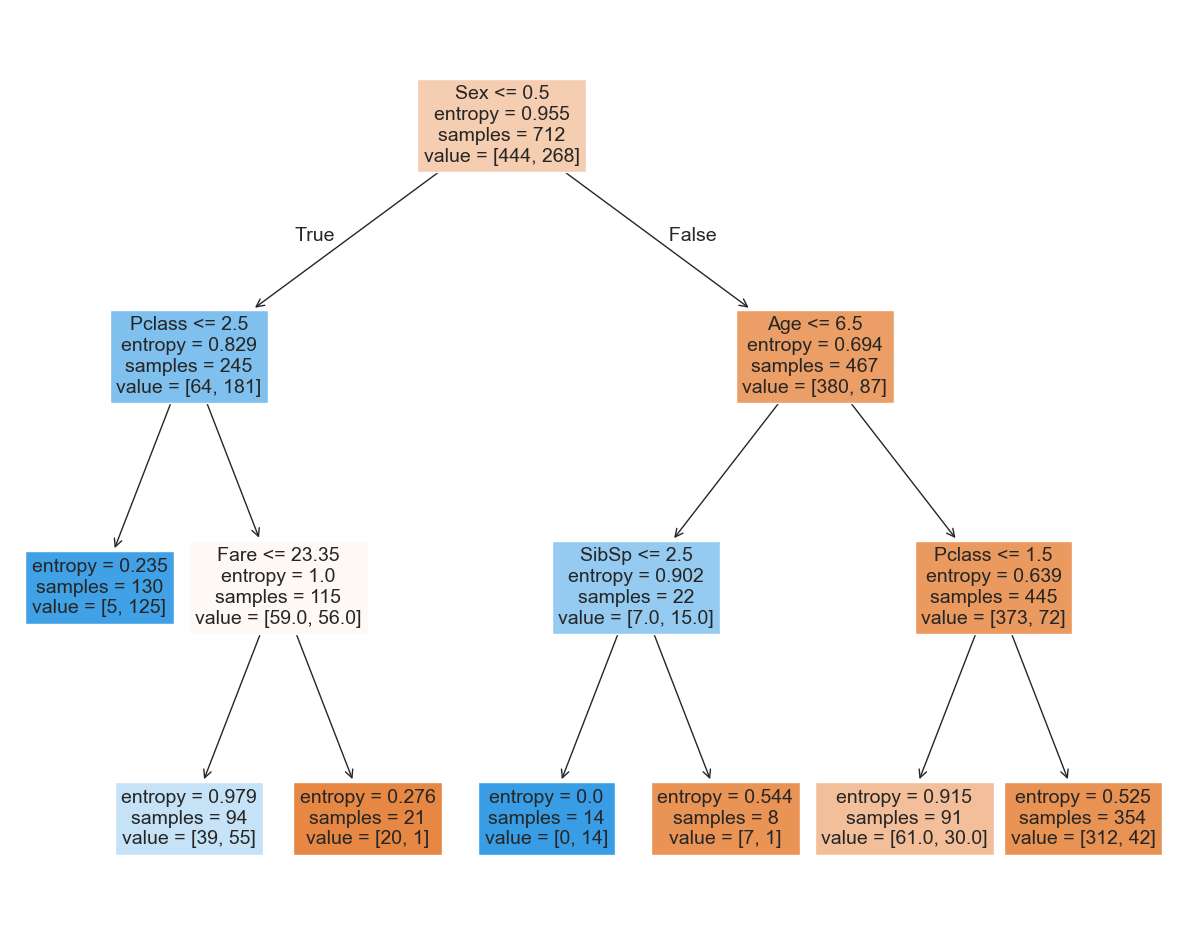

In [43]:
plt.figure(figsize=(15,12))
tree.plot_tree(clf, filled=True, 
          feature_names= list(inputs.columns))
plt.show()

#### confusion matrix function

In [46]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


#### plot f1-score and confusion matrix

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion matrix, without normalization
[[92 13]
 [23 51]]


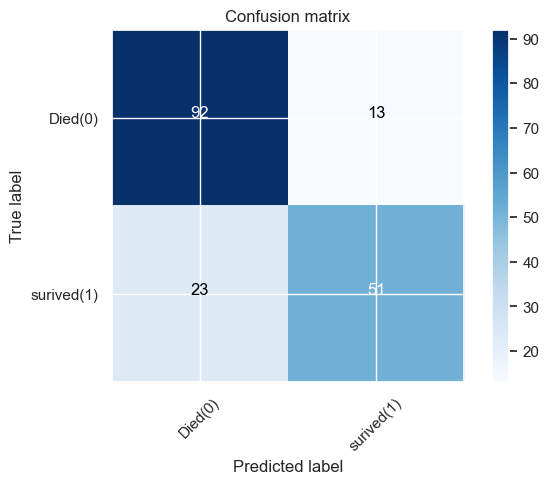

In [48]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_test_hat, labels=[0,1])
np.set_printoptions(precision=2)

print (metrics.classification_report(y_test, y_test_hat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Died(0)','surived(1)'],normalize= False,  title='Confusion matrix')

### f1-score

In [52]:
metrics.f1_score(y_test, y_test_hat, average='weighted') 

0.7961666703468986